# Very Deep Convolutional Networks for Large-Scale Image Recognition (VGG)

## 0. Paper

### Info
* TItle : Very Deep Convolutional Networks for Large-Scale Image Recognition (VGG)
* Author : Karen Simonyan
* Link : https://arxiv.org/pdf/1409.1556.pdf

### Summary
* Evaluation of networks of increasing depth using an architecture with very small (3 x 3) convolution filters.

### Features
* Dataset: CIFAR-10

### Reference
* https://github.com/kuangliu/pytorch-cifar/blob/master/models/vgg.py
* https://github.com/tensorflow/tensorflow/blob/v2.4.0/tensorflow/python/keras/applications/vgg16.py#L45-L226
* https://keras.io/examples/vision/image_classification_from_scratch/

## 1. Setting

In [1]:
# Libraries
import os
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras.backend as K

In [55]:
# Hyperparameters
BASE_DIR = '/content/drive/Shared drives/Yoon/Project/Doing/Deep Learning Paper Implementation',

## 2. Data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


## 3. Model

In [56]:
def create_model(model_cfg):
    reg = tf.keras.regularizers.l2(5e-4)
    inputs = tf.keras.layers.Input((32, 32, 3))
    x = tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./127.5, offset=-1.)(inputs)

    for c in model_cfg:
        if c == 'Pool':
            x = tf.keras.layers.MaxPooling2D(2)(x)
        else:
            x = tf.keras.layers.Conv2D(c, 3, 1, padding='same', activation='relu', kernel_regularizer=reg)(x)
    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    return tf.keras.Model(inputs, outputs)

In [69]:
model_cfg = [64, 64, 'Pool', 128, 128, 'Pool', 256, 256, 256, 'Pool', 512, 512, 512, 'Pool', 512, 512, 512] # VGG16
model = create_model(model_cfg)

In [70]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [71]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_8 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 16, 16, 128)       1475

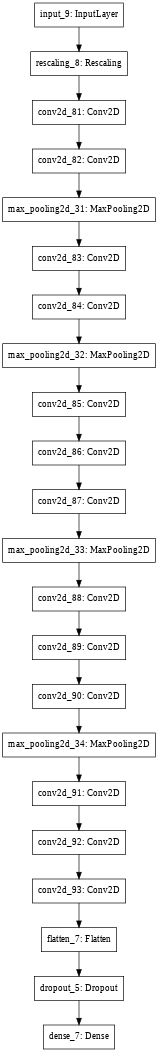

In [72]:
tf.keras.utils.plot_model(model, dpi=48)

## 4. Experiment

In [73]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=1, verbose=1, mode='max', min_lr=0)

In [74]:
hist = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    batch_size = 128,
    epochs = 100,
    callbacks = [lr_callback]
)

Epoch 1/100
313/313 [==============================] - 8s 22ms/step - loss: 4.2092 - acc: 0.1004 - val_loss: 4.1213 - val_acc: 0.0997
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 4.0725 - acc: 0.1304 - val_loss: 3.6962 - val_acc: 0.2373
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 3.6273 - acc: 0.2436 - val_loss: 3.3506 - val_acc: 0.3361
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 3.2632 - acc: 0.3552 - val_loss: 3.1213 - val_acc: 0.3917
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 3.0305 - acc: 0.4194 - val_loss: 2.8461 - val_acc: 0.4811
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 2.8015 - acc: 0.4798 - val_loss: 2.6134 - val_acc: 0.5425
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 2.5875 - acc: 0.5447 - val_loss: 2.4513 - val_acc: 0.5815
Epoch 8/100
313/313 [==============================] - 6s 20ms

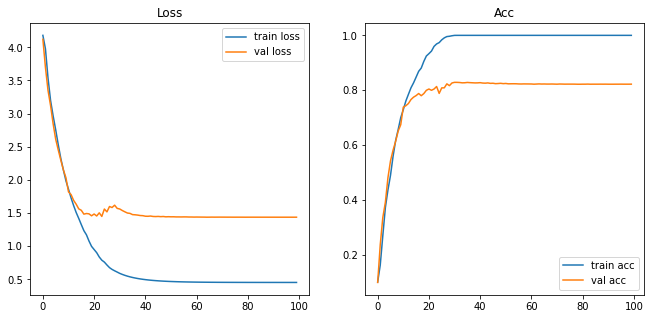

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))

ax[0].plot(hist.history['loss'])
ax[0].plot(hist.history['val_loss'])
ax[0].set_title('Loss')
ax[0].legend(['train loss', 'val loss'])

ax[1].plot(hist.history['acc'])
ax[1].plot(hist.history['val_acc'])
ax[1].set_title('Acc')
ax[1].legend(['train acc', 'val acc'])

plt.show()

In [83]:
_ = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4724 - acc: 0.8155
